# Exploratory Data Analysis (EDA) with Python to apply Logistic Regression

In [1]:
# Importing Libraries
import pandas as pd # to read and pre-process the data
import numpy as np # to work with [single to multi dimensional] arrays
import seaborn as sns # to handle statistical function and create visualization graph
import matplotlib.pyplot as plt # to create visualization graph
%matplotlib inline

In [2]:
# reading the "titanic" dataset
train = pd.read_csv('titanic_train.csv')
train
# "SibSp" ~ Number of 'Sib'ling and 'Sp'ouse
# "Parch" ~ Number of 'Par'ent and 'ch'ild

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# Checking whether there are Nan / null values in each feature / column
train.isnull()
# not a good visualization to analyze

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
# Counting Number of Nan / null values in each feature / column
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

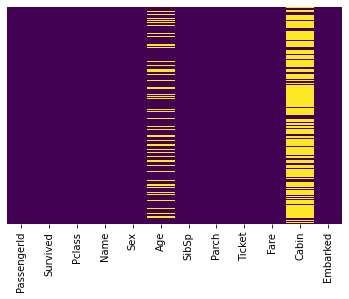

In [5]:
# data visualization to see the Nan / null values in each feature / column
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
# "yticklabels=False" means count the frequency / index on y axis & put features on x-axiz
# cmap='viridis' ~ styling parameter


# observe the HeatMap ~ all the Null values are shown in Yellow color

<AxesSubplot:>

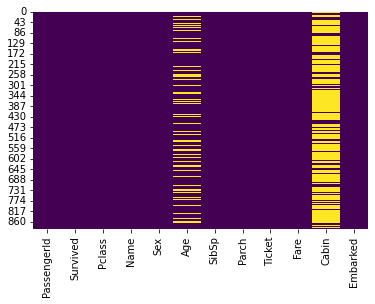

In [6]:
# data visualization to see the Nan / null values in each feature / column
sns.heatmap(train.isnull(),xticklabels=True,cbar=False,cmap='viridis')
# "yticklabels=False" is replaced with "xticklabels=True"


# observe the HeatMap

<AxesSubplot:xlabel='Survived', ylabel='count'>

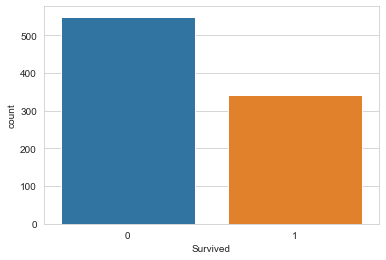

In [7]:
sns.set_style('whitegrid') # to set background 'white' colored
sns.countplot(x='Survived',data=train)  #drawing 'Counterplot'
# 'Survived = 0' ~ Not Survived
# 'Survived = 1 ~ Yes, Survived

<AxesSubplot:xlabel='Survived', ylabel='count'>

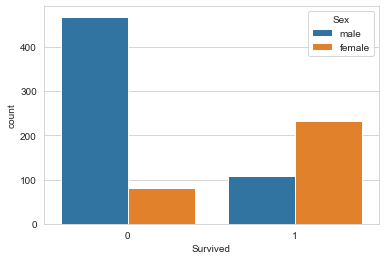

In [8]:
# Comparing 'Sex' feature wrt 'Survived' feature
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train)
# survived: male(100+) < Female(220+)

<AxesSubplot:xlabel='Survived', ylabel='count'>

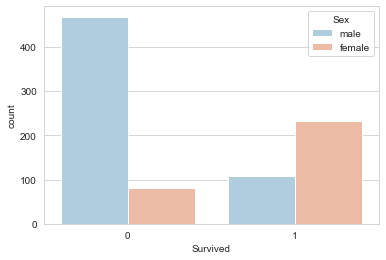

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')
# [palette='RdBu_r'] ~ coloring parameter

<AxesSubplot:xlabel='Survived', ylabel='count'>

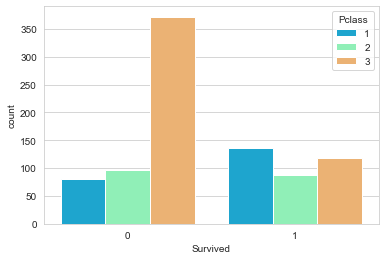

In [10]:
# Comparing Passenger Class 'Pclass' feature wrt 'Survived' feature
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')
# [palette='rainbow'] ~ coloring parameter
# Pclass1 ~ richest passenger
# Pclass2 ~ middle class
# Pclass3 ~ poorest labor

# Analysis --> Died[0] : Pclass1 < Pclass2 <<< Pclass3

C:\Users\Kapil Wanaskar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

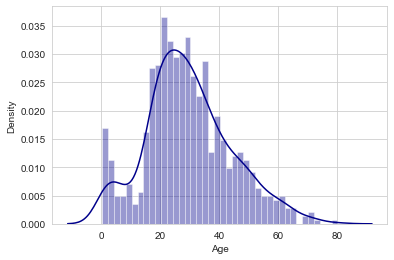

In [11]:
# Drawing 'Dist'ribution Plot ~ " " of the "age" feature
sns.distplot(train.Age.dropna(),kde=True,color='darkblue',bins=40) # from seaborn library
# kde = kernel density estimation ~ probability density function

# Analysis --> Maxm number of people between age 17 and 30

<AxesSubplot:>

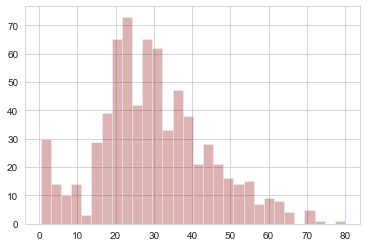

In [12]:
# plotting Histogram '.hist'
train['Age'].hist(bins=30,color='darkred',alpha=0.3)  # from MatPlotlib library

<AxesSubplot:xlabel='SibSp', ylabel='count'>

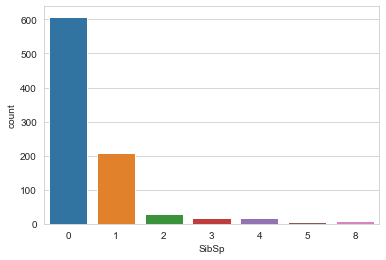

In [13]:
# drawing 'countplot' of Sibling + Spouse ~ 'SibSp'
sns.countplot(x='SibSp',data=train)

# Analysis --> almoost 600 people have no sibling / spouse[0]

<AxesSubplot:>

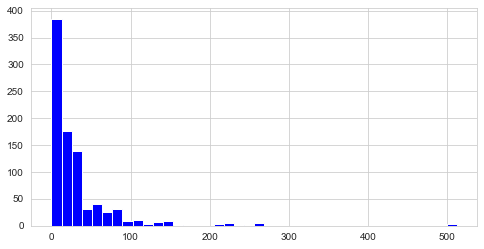

In [14]:
train.Fare.hist(color='blue',bins=40,figsize=(8,4))

# EDA 29) 

# Data Cleaning

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

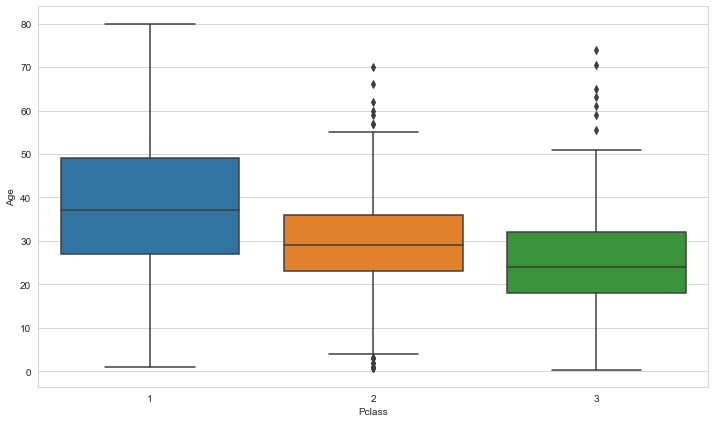

In [15]:
# Drawing BoxPlots
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=train)

# 3 boxplots for Pclass 1,2 & 3
# Notice 25th, 50th & 75th percentile in the boxplots

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

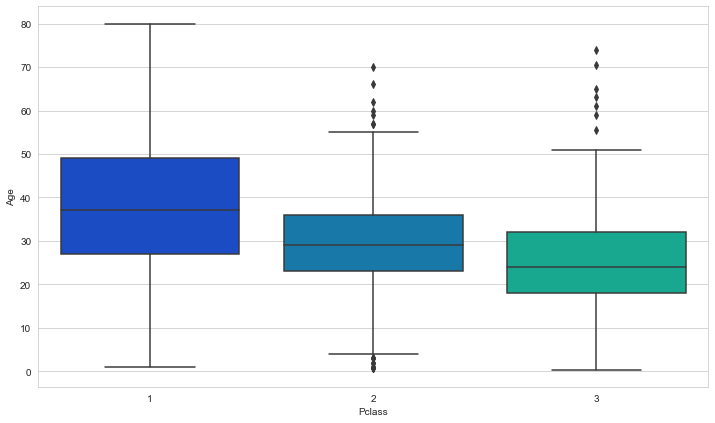

In [16]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

# palette='winter' --> Coloring parameter

# Analysis --> Avg.Age of Pclass1 (~37) > Pclass2 (~29) > Pclass3 (~24)

In [17]:
# As, Avg.Age of Pclass1 (~37) > Pclass2 (~29) > Pclass3 (~24)
# So, lets replace Null values with respective average

# defining new function while putting the above condition

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age): # If "Age" feature has Null value
        
        if Pclass == 1:
            return 37  # average of Age of Pclass1
        
        elif Pclass == 2:
            return 29  # average of Age of Pclass2
        
        else:
            return 24  # average of Age of Pclass3
    
    else:
        return Age


In [18]:
# applying the above 'impute_age' function
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

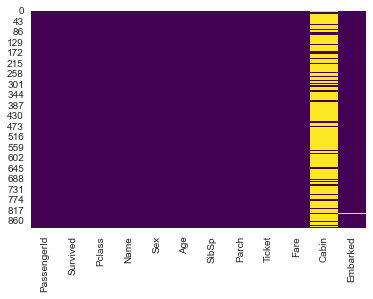

In [19]:
# checking the HeatMap again
sns.heatmap(train.isnull(),xticklabels=True,cbar=False,cmap='viridis')

#Analysis --> Replaced all nan values in "Age" feature, 
# but "Cabin" values are not replaced


In [20]:
# As "cabin" feature has lot of Null values, lets DROP it
train.drop('Cabin',axis=1,inplace=True)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


<AxesSubplot:>

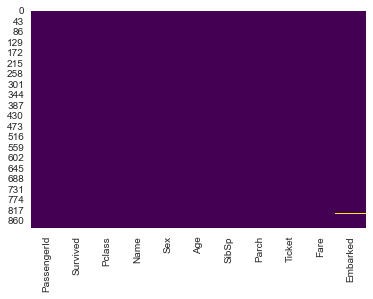

In [21]:
# checking the HeatMap again
sns.heatmap(train.isnull(),xticklabels=True,cbar=False,cmap='viridis')

# No 'Cabin' feature or its Null values

In [22]:
train.dropna(inplace=True)

In [23]:

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [24]:
# Focussing on Limited Categorical Features ['Sex','Embarked']

# One Hot Encoding
pd.get_dummies(train['Embarked'])
# dissecting the categories of the feature 'Embarked'

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [25]:
pd.get_dummies(train['Embarked'],drop_first=True).head()
# "drop_first=True" ~ dropping the first category

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [26]:
# Similar One Hot Encoding for other Limited categorical features
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [27]:
# Dropping un-necessary columns / features: Passenger ID, Name, Ticket
#& dropping old features: Sex, Embarked
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,24.0,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [28]:
# Joining / "concat"enating new features: 'sex' , 'embark'
train = pd.concat([train,sex,embark],axis=1)
train
# male = 1 means male & male = 0 means female
# Q,S = 0,0 means C = 1

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1,0,1
887,888,1,1,19.0,0,0,30.0000,0,0,1
888,889,0,3,24.0,1,2,23.4500,0,0,1
889,890,1,1,26.0,0,0,30.0000,1,0,0


In [29]:
# defining Dependent (y) and independent (Xi) features
y = train['Survived']
x = train.drop('Survived',axis=1)
print([y,x])

[0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64,      PassengerId  Pclass   Age  SibSp  Parch     Fare  male  Q  S
0              1       3  22.0      1      0   7.2500     1  0  1
1              2       1  38.0      1      0  71.2833     0  0  0
2              3       3  26.0      0      0   7.9250     0  0  1
3              4       1  35.0      1      0  53.1000     0  0  1
4              5       3  35.0      0      0   8.0500     1  0  1
..           ...     ...   ...    ...    ...      ...   ... .. ..
886          887       2  27.0      0      0  13.0000     1  0  1
887          888       1  19.0      0      0  30.0000     0  0  1
888          889       3  24.0      1      2  23.4500     0  0  1
889          890       1  26.0      0      0  30.0000     1  0  0
890          891       3  32.0      0      0   7.7500     1  1  0

[889 rows x 9 columns]]


In [33]:
# executing "train_test_split" (70-30)% split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.30,random_state=101)

In [36]:
# Training the model
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\Kapil Wanaskar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [49]:
# Predicting
predictions = logmodel.predict(X_test)
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [46]:
from sklearn.metrics  import confusion_matrix

accuracy1 = confusion_matrix(y_test,predictions)
accuracy1

array([[152,  11],
       [ 40,  64]], dtype=int64)

In [48]:
from sklearn.metrics import accuracy_score
accuracy2 = accuracy_score(y_test,predictions)
accuracy2

0.8089887640449438